In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/RotNet

/content/drive/MyDrive/RotNet


In [ ]:
!pip install -r requirements.txt

In [3]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=b6374b72c2038f4911975d4b036abe033d7a81ea07a3b467e2ca5a5f107ee345
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import print_function

import os
import sys
import matplotlib.pyplot as plt

from keras.applications.imagenet_utils import preprocess_input
from keras.models import load_model

sys.path.append('..')
from utils import display_examples, RotNetDataGenerator, angle_error
from data.street_view import get_filenames

In [5]:
root_dir = './'

## Load file names

In [6]:
street_view_dir = os.path.join('..', 'data', 'street_view')

if os.path.exists(street_view_dir):
    test_filenames = get_filenames(street_view_dir)[1]
else:
    test_examples_path = os.path.join(root_dir, 'dataset')
    test_filenames = [
        os.path.join(test_examples_path, f) for f in os.listdir(test_examples_path)
    ]

In [7]:
print(len(test_filenames))

850


## Load model

In [9]:
model_location = '/content/drive/MyDrive/RotNet/model/rotnet_barcode_view_resnet50_v2.hdf5'
model = load_model(model_location, custom_objects={'angle_error': angle_error})

## Display examples

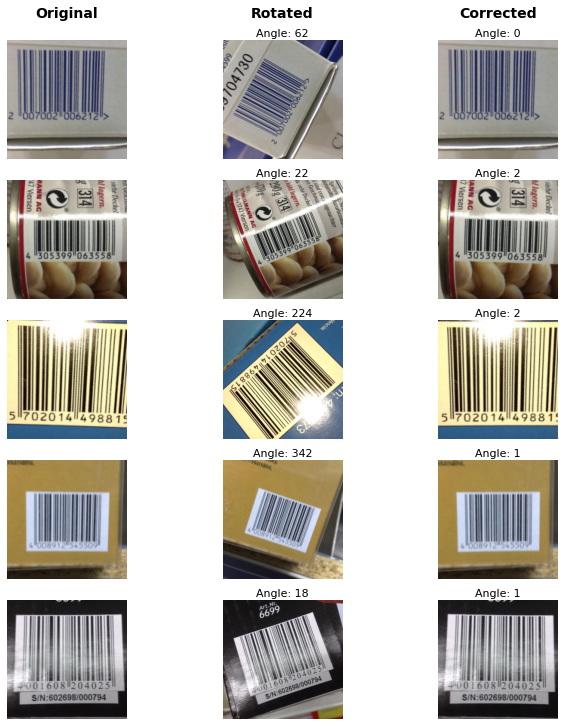

In [10]:
num_images = 5

display_examples(
    model, 
    test_filenames,
    num_images=num_images,
    size=(224, 224),
    crop_center=True,
    crop_largest_rect=True,
    preprocess_func=preprocess_input,
)